In [1]:
# Use kernel classAL
import matplotlib.pyplot as plt
import os
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def read_metrics_from_file(file_path):
    indices = []
    acc_avg = []
    auc_avg = []
    f1_avg = []
    acc_stddev = []
    auc_stddev = []
    f1_stddev = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Remove any leading/trailing spaces
            if not line:  # Skip empty lines
                continue

            parts = line.split()
            if len(parts) == 9:  # We expect 9 values (3 values of avg ± stddev)
                try:
                    # Parse the accuracy values (avg and stddev)
                    acc_avg_value = float(parts[0])
                    acc_stddev_value = float(parts[2].strip())
                    acc_avg.append(acc_avg_value)
                    acc_stddev.append(acc_stddev_value)

                    # Parse the AUC values (avg and stddev)
                    auc_avg_value = float(parts[3])
                    auc_stddev_value = float(parts[5].strip())
                    auc_avg.append(auc_avg_value)
                    auc_stddev.append(auc_stddev_value)

                    # Parse the F1 values (avg and stddev)
                    f1_avg_value = float(parts[6])
                    f1_stddev_value = float(parts[8].strip())
                    f1_avg.append(f1_avg_value)
                    f1_stddev.append(f1_stddev_value)

                    # Increment indices
                    indices.append(len(indices) + 1)

                except ValueError as e:
                    print(f"Error parsing line: {line} - {e}")
                    continue
            else:
                print(f"Len of parts in this line is {len(parts)}")

    return indices, acc_avg, auc_avg, f1_avg, acc_stddev, auc_stddev, f1_stddev


In [3]:


def plot_many_datasets(files):
    """
    Plots accuracy, AUC, and F1 scores for multiple datasets and algorithms.
    Each column represents a dataset, and each row is a metric (Accuracy, AUC, F1).
    
    :param files_and_algorithms: A list of tuples, where each tuple contains
                                  (file_path, algorithm_name, dataset_name).
    """
    # Extract unique dataset names and count
    datasets = sorted(set(row[2] for row in files))
    num_datasets = len(datasets)

    # Create a figure with subplots of size (3 rows, #Datasets columns)
    fig, axes = plt.subplots(3, num_datasets, figsize=(5 * num_datasets, 15), sharex='col')
    
    # If there's only one dataset, ensure axes is a 2D array
    if num_datasets == 1:
        axes = axes.reshape(3, 1)

    # Define markers, linestyles, and colormap for algorithms
    markers = {'accuracy': 'o', 'auc': 'x', 'f1': 's'}
    linestyles = {'accuracy': '-', 'auc': '--', 'f1': ':'}
    colors = plt.cm.tab10.colors  # 10 distinct colors

    # Process each dataset
    for col, dataset in enumerate(datasets):
        dataset_files = [row for row in files if row[2] == dataset]

        for i, (file_path, algorithm_name, _) in enumerate(dataset_files):
            if os.path.exists(file_path):  # Check if file exists
                indices, acc, auc, f1, acc_stddev, auc_stddev, f1_stddev = read_metrics_from_file(file_path)
                color = colors[i % len(colors)]

                # # Plot each metric on the appropriate row
                # axes[0, col].errorbar(indices, acc, yerr=acc_stddev, marker=markers['accuracy'], 
                #                       linestyle=linestyles['accuracy'], color=color, 
                #                       label=algorithm_name)
                # axes[1, col].errorbar(indices, auc, yerr=auc_stddev, marker=markers['auc'], 
                #                       linestyle=linestyles['auc'], color=color, 
                #                       label=algorithm_name)
                # axes[2, col].errorbar(indices, f1, yerr=f1_stddev, marker=markers['f1'], 
                #                       linestyle=linestyles['f1'], color=color, 
                #                       label=algorithm_name)
                
                # Plotting the metrics for this algorithm using the same color but different markers/linestyles
                axes[0, col].plot(indices, acc, marker=markers['accuracy'], linestyle=linestyles['accuracy'], 
                            color=color, label=f'{algorithm_name} (Acc)')
                axes[1, col].plot(indices, auc, marker=markers['auc'], linestyle=linestyles['auc'], 
                            color=color, label=f'{algorithm_name} (AUC)')
                axes[2, col].plot(indices, f1, marker=markers['f1'], linestyle=linestyles['f1'], 
                            color=color, label=f'{algorithm_name} (F1)')
                
                # Add the shaded region for standard deviation
                axes[0, col].fill_between(indices, 
                                    [a - s for a, s in zip(acc, acc_stddev)], 
                                    [a + s for a, s in zip(acc, acc_stddev)], 
                                    color=color, alpha=0.2)
                axes[1, col].fill_between(indices, 
                                    [a - s for a, s in zip(auc, auc_stddev)], 
                                    [a + s for a, s in zip(auc, auc_stddev)], 
                                    color=color, alpha=0.2)
                axes[2, col].fill_between(indices, 
                                    [a - s for a, s in zip(f1, f1_stddev)], 
                                    [a + s for a, s in zip(f1, f1_stddev)], 
                                    color=color, alpha=0.2)
            else:
                print(f"File not found: {file_path}")

        # Add titles and legends for each dataset column
        axes[0, col].set_title(f'Accuracy - {dataset}')
        axes[1, col].set_title(f'AUC - {dataset}')
        axes[2, col].set_title(f'F1 Score - {dataset}')

        for row in range(3):
            axes[row, col].legend(loc='best')
            axes[row, col].set_xlabel('AL Steps')
            axes[row, col].xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer ticks

    # Set shared Y-labels for rows
    axes[0, 0].set_ylabel('Accuracy')
    axes[1, 0].set_ylabel('AUC')
    axes[2, 0].set_ylabel('F1 Score')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


In [4]:
def plot_all_metrics(files_and_algorithms):
    """
    Plots accuracy, AUC, and F1 scores for different algorithms on three subplots:
    one for accuracy, one for AUC, and one for F1 score.
    
    :param files_and_algorithms: A list of tuples, where each tuple contains
                                  the file path and the algorithm name.
    """
    # Create a figure with 3 subplots (one for each metric)
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column
    
    # Define some markers and linestyles for the metrics
    markers = {'accuracy': 'o', 'auc': 'x', 'f1': 's'}
    linestyles = {'accuracy': '-', 'auc': '--', 'f1': ':'}
    
    # Define a colormap and assign a unique color for each algorithm
    colors = plt.cm.tab10.colors  # 10 distinct colors
    
    # Iterate through each file and algorithm, and plot their metrics
    for i, (file_path, algorithm_name) in enumerate(files_and_algorithms):
        if os.path.exists(file_path):  # Check if file exists
            indices, acc, auc, f1, acc_stddev, auc_stddev, f1_stddev = read_metrics_from_file(file_path)
            
            # Assign a color from the colormap based on the index
            color = colors[i % len(colors)]
            
            # Plotting the metrics for this algorithm using the same color but different markers/linestyles
            axes[0].plot(indices, acc, marker=markers['accuracy'], linestyle=linestyles['accuracy'], 
                         color=color, label=f'{algorithm_name} (Acc)')
            axes[1].plot(indices, auc, marker=markers['auc'], linestyle=linestyles['auc'], 
                         color=color, label=f'{algorithm_name} (AUC)')
            axes[2].plot(indices, f1, marker=markers['f1'], linestyle=linestyles['f1'], 
                         color=color, label=f'{algorithm_name} (F1)')
            
            # Optionally, add the shaded region for standard deviation
            axes[0].fill_between(indices, 
                                 [a - s for a, s in zip(acc, acc_stddev)], 
                                 [a + s for a, s in zip(acc, acc_stddev)], 
                                 color=color, alpha=0.2)
            axes[1].fill_between(indices, 
                                 [a - s for a, s in zip(auc, auc_stddev)], 
                                 [a + s for a, s in zip(auc, auc_stddev)], 
                                 color=color, alpha=0.2)
            axes[2].fill_between(indices, 
                                 [a - s for a, s in zip(f1, f1_stddev)], 
                                 [a + s for a, s in zip(f1, f1_stddev)], 
                                 color=color, alpha=0.2)
        else:
            print(f"File not found: {file_path}")
    
    # Add titles, labels, and legends for each subplot
    axes[0].set_title('Accuracy')
    axes[0].set_xlabel('AL Steps')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend(loc='best')
    
    axes[1].set_title('AUC')
    axes[1].set_xlabel('AL Steps')
    axes[1].set_ylabel('AUC')
    axes[1].legend(loc='best')
    
    axes[2].set_title('F1 Score')
    axes[2].set_xlabel('AL Steps')
    axes[2].set_ylabel('F1 Score')
    axes[2].legend(loc='best')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [5]:
files_and_algorithms = [
    ('../result/appendicitis-svmstyle_result_hierarchical_5.txt', 'Hierarchical'),
    ('../result/appendicitis-svmstyle_result_informative_diverse_5.txt', 'Informative-Diverse'),
]

for i, (file_path, algorithm_name) in enumerate(files_and_algorithms):
    if os.path.exists(file_path):  # Check if file exists
        indices, acc, auc, f1, acc_stddev, auc_stddev, f1_stddev = read_metrics_from_file(file_path)
        print(f"File: {file_path} - Length of indices: {len(indices)}")
        print(f"File: {file_path} - Length of acc_stddev: {len(acc_stddev)}")
        print(f"Acc: {acc[:5]}")  # Print first 5 values for sanity check
        print(f"AUC: {auc[:5]}")
        print(f"F1: {f1[:5]}")
        print(f"F1 std dev: {f1_stddev[:5]}")


File: ../result/appendicitis-svmstyle_result_hierarchical_5.txt - Length of indices: 10
File: ../result/appendicitis-svmstyle_result_hierarchical_5.txt - Length of acc_stddev: 10
Acc: [0.8417, 0.846, 0.8483, 0.8483, 0.8555]
AUC: [0.6616, 0.6832, 0.6922, 0.6929, 0.7133]
F1: [0.4142, 0.4653, 0.4856, 0.4884, 0.54]
F1 std dev: [0.2714, 0.2444, 0.2211, 0.2307, 0.1842]
File: ../result/appendicitis-svmstyle_result_informative_diverse_5.txt - Length of indices: 10
File: ../result/appendicitis-svmstyle_result_informative_diverse_5.txt - Length of acc_stddev: 10
Acc: [0.8417, 0.8481, 0.8579, 0.8571, 0.8586]
AUC: [0.6616, 0.6854, 0.7104, 0.711, 0.7215]
F1: [0.4142, 0.4739, 0.5363, 0.5389, 0.5601]
F1 std dev: [0.2714, 0.2372, 0.1892, 0.1757, 0.1499]


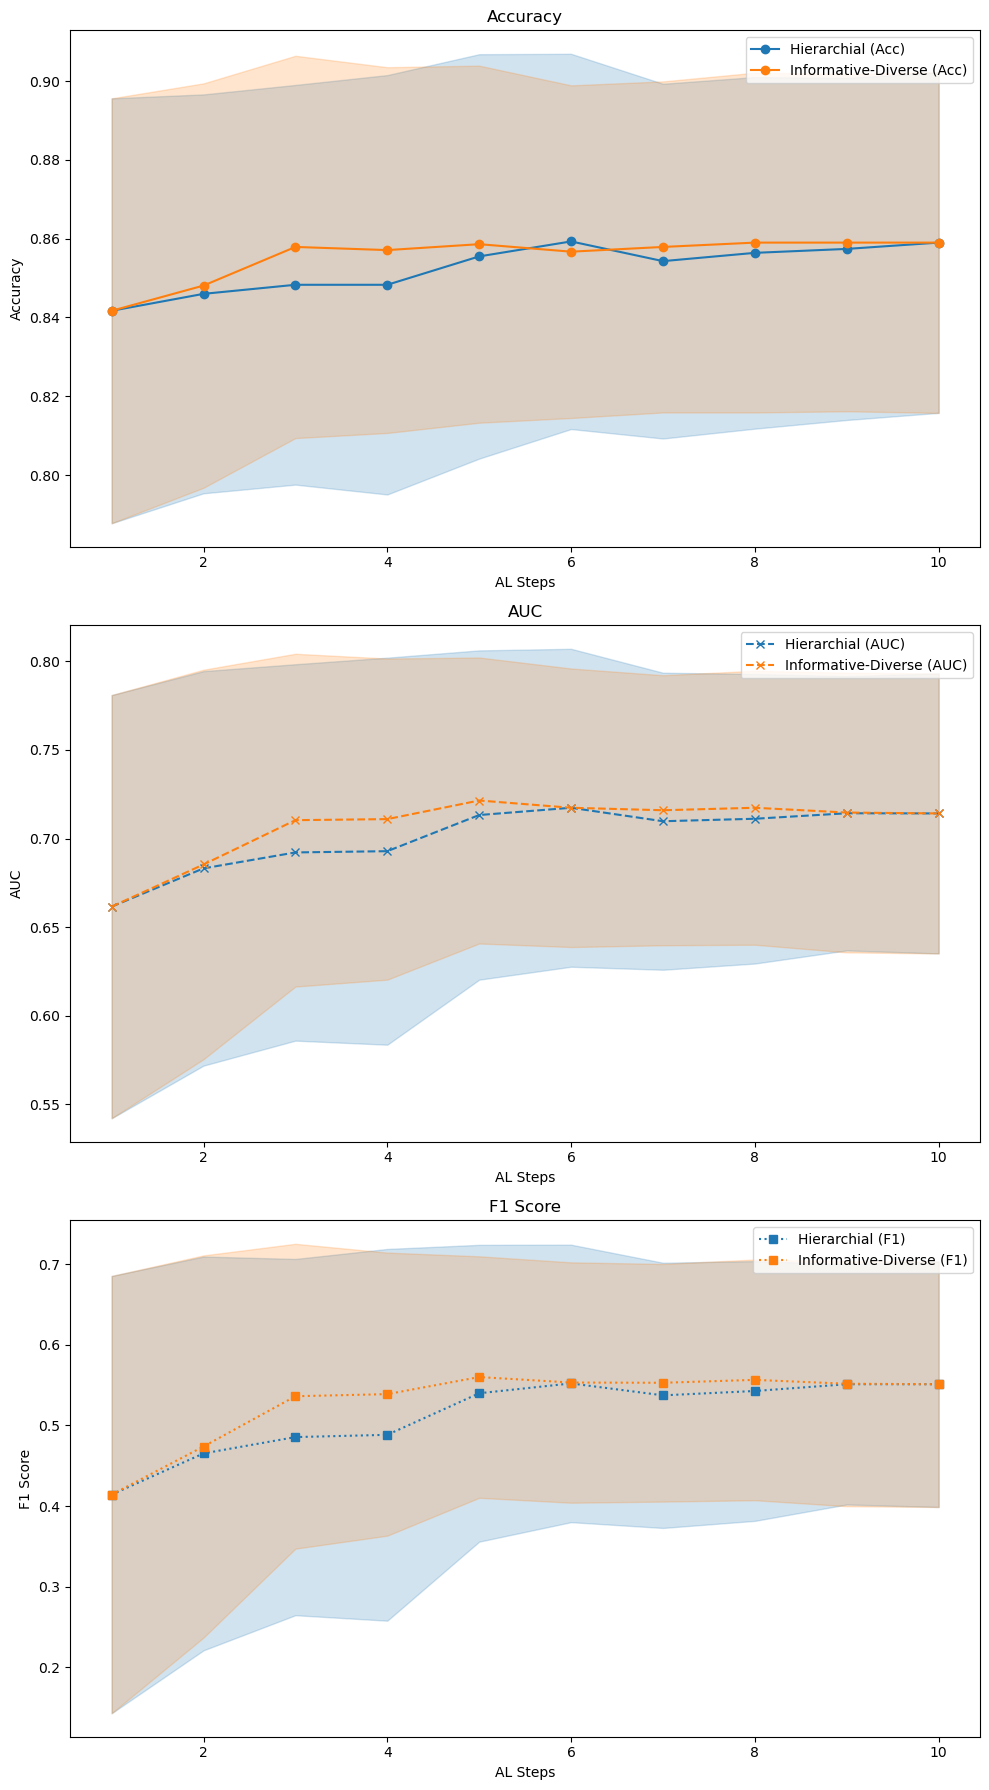

In [6]:
files_and_algorithms = [
    ('../result/appendicitis-svmstyle_result_hierarchical_5.txt', 'Hierarchial'),
    ('../result/appendicitis-svmstyle_result_informative_diverse_5.txt', 'Informative-Diverse'),
]


# Call the function to plot all metrics
plot_all_metrics(files_and_algorithms)

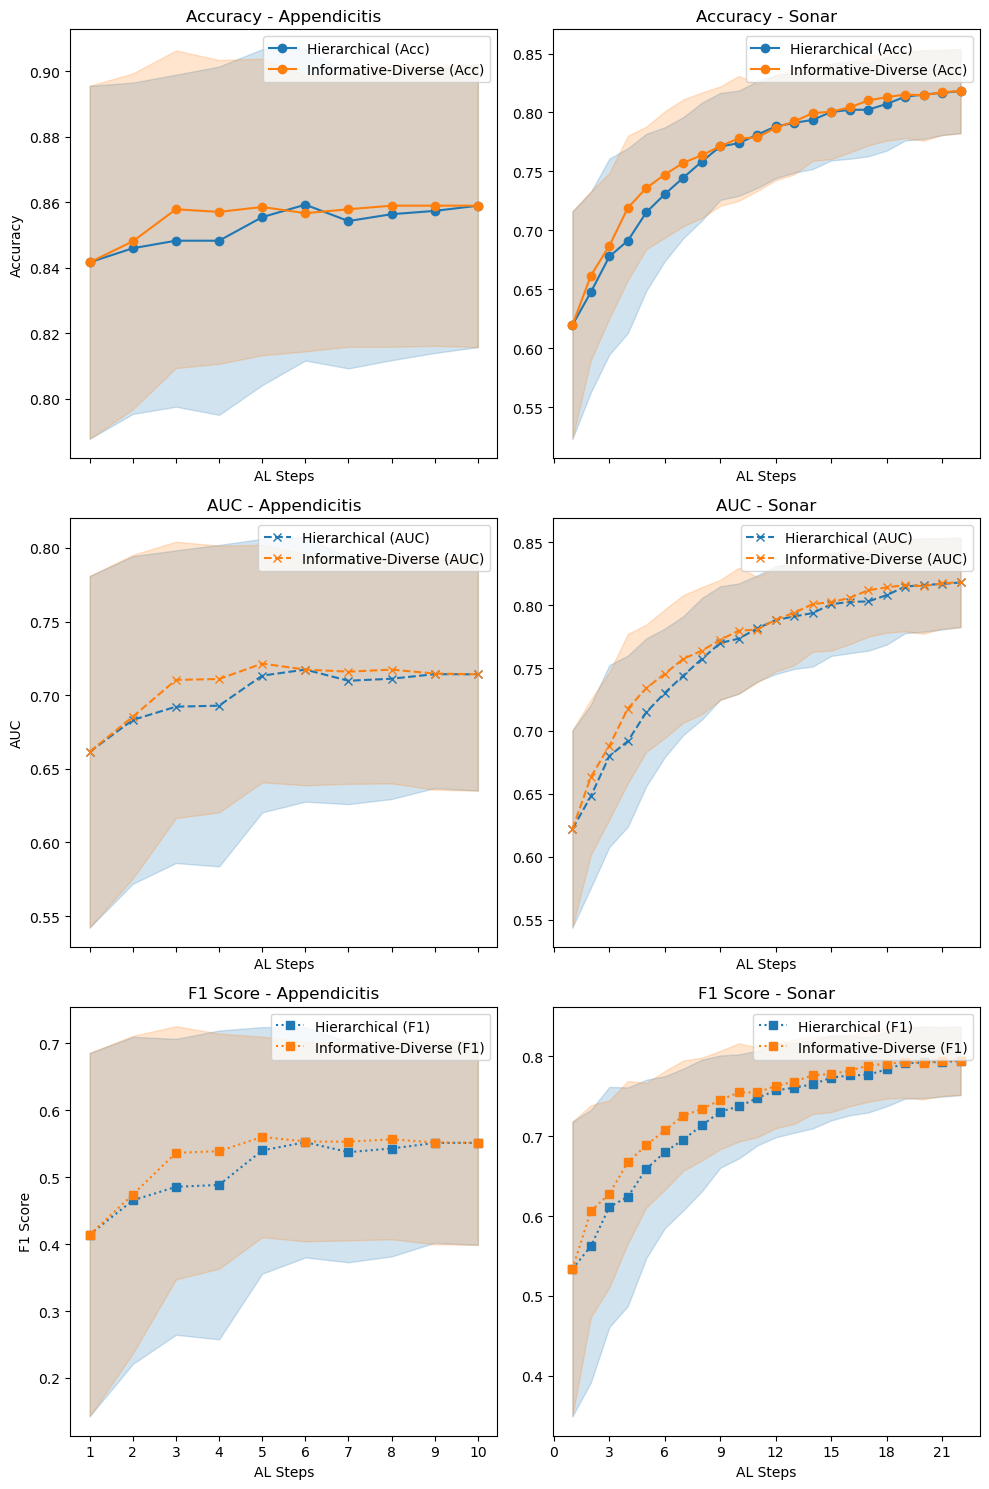

In [7]:
files = [
    ('../result/appendicitis-svmstyle_result_hierarchical_5.txt', 'Hierarchical', 'Appendicitis'),
    ('../result/appendicitis-svmstyle_result_informative_diverse_5.txt', 'Informative-Diverse', 'Appendicitis'),
    ('../result/sonar-svmstyle_result_hierarchical_5.txt', 'Hierarchical', 'Sonar'),
    ('../result/sonar-svmstyle_result_informative_diverse_5.txt', 'Informative-Diverse', 'Sonar'),
]


# Call the function to plot all metrics
plot_many_datasets(files)